In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

 #Le lien que vous avez partagé mène à une page Yahoo
 #Finance contenant les données historiques de Microsoft
 #Cela indique que la page affiche les informations sur les actions de Microsoft.msft

Colonnes des données : Date : Date à laquelle les données de l'action ont été enregistrées. Open : Le prix d'ouverture de l'action MSFT à cette date. High : Le prix le plus élevé que l'action a atteint dans la journée. Low : Le prix le plus bas atteint ce jour-là. Close : Le prix de clôture de l'action MSFT à la fin de la journée. Adj Close : Le prix de clôture ajusté pour tenir compte des événements comme les dividendes et les splits d'actions. Volume : Le nombre total d'actions échangées ce jour-là.

In [3]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [4]:
df = df[['Date', 'Close']] #sélectionne seulement les colonnes 'Date' et 'Close

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9078,2022-03-18,300.429993
9079,2022-03-21,299.160004
9080,2022-03-22,304.059998
9081,2022-03-23,299.489990


In [5]:
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9078,2022-03-18
9079,2022-03-21
9080,2022-03-22
9081,2022-03-23


In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object
#convertit une date au format chaîne de caractères (par exemple, '1986-03-19') en un objet datetime.
# Elle sépare la chaîne en année, mois et jour, puis retourne un objet datetime correspondant à cette date.

datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9078,2022-03-18
9079,2022-03-21
9080,2022-03-22
9081,2022-03-23


In [8]:
df.index = df.pop('Date')
df #désormais les valeurs de la colonne 'Date' comme nouvel index, et la colonne 'Date' est supprimée du DataFrame.

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-03-18,300.429993
2022-03-21,299.160004
2022-03-22,304.059998


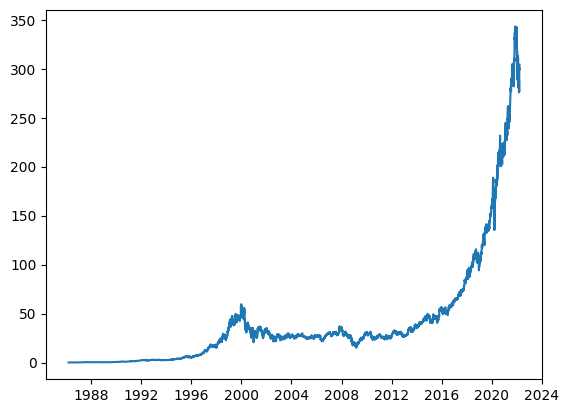

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close']) #l'évolution des prix de clôture des actions à travers le temps

In [10]:
import numpy as np

# Fonction pour créer un DataFrame avec des fenêtres glissantes.
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    # Convertit les chaînes de caractères des dates en objets datetime.
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    # Définir la première date cible à traiter.
    target_date = first_date

    # Initialisation des listes pour stocker les dates, les entrées (X) et les cibles (Y).
    dates = []
    X, Y = [], []

    # Variable pour savoir si on est à la dernière itération.
    last_time = False

    # Boucle principale pour parcourir les dates cibles.
    while True:
        # Récupérer les dernières n+1 lignes de données jusqu'à la date cible.
        df_subset = dataframe.loc[:target_date].tail(n+1)

        # Si le sous-ensemble de données est trop petit, afficher une erreur et arrêter.
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        # Convertir les valeurs de la colonne 'Close' en tableau NumPy.
        values = df_subset['Close'].to_numpy()

        # Les n premières valeurs sont utilisées comme entrée (X), et la dernière comme cible (Y).
        x, y = values[:-1], values[-1]

        # Ajouter la date cible et les données dans les listes.
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Avancer d'une semaine pour la prochaine date.
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]

        # Extraire la prochaine date à partir de la prochaine semaine.
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]

        # Extraire l'année, le mois et le jour de la prochaine date.
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        # Si on a atteint la dernière date, arrêter la boucle.
        if last_time:
            break

        # Définir la prochaine date cible pour l'itération suivante.
        target_date = next_date

        # Si la date cible est la dernière date, marquer qu'on est à la dernière itération.
        if target_date == last_date:
            last_time = True

    # Création du DataFrame pour stocker les résultats des fenêtres glissantes.
    ret_df = pd.DataFrame({})

    # Ajouter la colonne 'Target Date' avec les dates cibles.
    ret_df['Target Date'] = dates

    # Convertir la liste X en tableau NumPy.
    X = np.array(X)

    # Ajouter chaque colonne Target-{n-i} correspondant aux n jours précédents.
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    # Ajouter la colonne 'Target' avec les cibles (prix de clôture du jour suivant).
    ret_df['Target'] = Y

    # Retourner le DataFrame avec les fenêtres glissantes.
    return ret_df

# Appel de la fonction pour créer un DataFrame avec des fenêtres de taille 3 sur la période donnée.
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df  # Affiche le DataFrame résultant.


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


La fonction transforme un DataFrame de séries temporelles en un nouveau DataFrame où chaque ligne représente une séquence de n jours de valeurs passées, utilisée pour prédire la valeur d’un jour futur. Ce type de transformation est couramment utilisé dans les modèles de prévision, tels que les réseaux de neurones récurrents ou LSTMs, qui nécessitent des séquences d'entrée pour faire des prédictions.

In [11]:
import numpy as np

# Fonction qui convertit un DataFrame fenêtré en trois éléments : les dates, les entrées X, et les cibles Y
def windowed_df_to_date_X_y(windowed_dataframe):

    # Convertir le DataFrame en tableau NumPy pour faciliter la manipulation
    df_as_np = windowed_dataframe.to_numpy()

    # Extraire la première colonne du tableau NumPy (correspondant aux dates)
    dates = df_as_np[:, 0]

    # Extraire toutes les colonnes intermédiaires (c'est-à-dire les valeurs des fenêtres glissantes)
    # On exclut la première colonne (dates) et la dernière colonne (valeurs cibles)
    middle_matrix = df_as_np[:, 1:-1]

    # Restructurer les données de la fenêtre pour avoir une forme 3D :
    # (nombre d'observations, taille de la fenêtre, 1) pour les algorithmes d'apprentissage machine
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    # Extraire la dernière colonne du tableau NumPy (les valeurs cibles à prédire)
    Y = df_as_np[:, -1]

    # Retourner les trois valeurs :
    # 1. Les dates correspondant à chaque observation
    # 2. Le tableau des fenêtres de prix (X)
    # 3. Les valeurs cibles à prédire (Y)
    return dates, X.astype(np.float32), Y.astype(np.float32)

# Utilisation de la fonction avec le DataFrame windowed_df
dates, X, y = windowed_df_to_date_X_y(windowed_df)

# Affichage des dimensions des trois tableaux retournés pour vérifier la structure des données
dates.shape, X.shape, y.shape


((252,), (252, 3, 1), (252,))

(252,) : Il y a 252 dates dans votre dataset, ce qui signifie que vous avez 252 fenêtres d'observations. (252, 3, 1) : Il y a 252 observations dans le tableau X, chacune contenant 3 prix de clôture (taille de la fenêtre = 3), et chaque prix est représenté comme un scalaire avec 1 dimension (d'où le 1). (252,) : Il y a également 252 valeurs cibles Y, correspondant au prix de clôture que vous voulez prédire pour chaque fenêtre d'entrée.

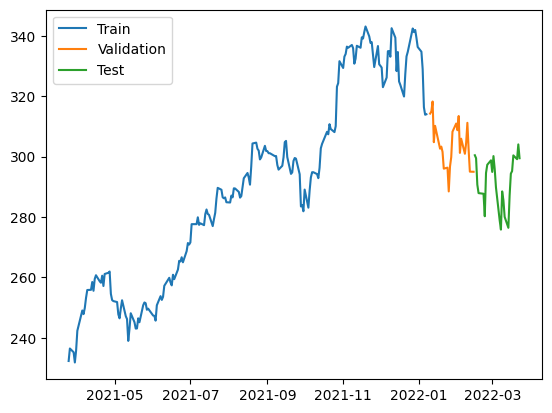

In [13]:
import matplotlib.pyplot as plt

# Calculer l'indice correspondant à 80% des données (pour l'ensemble d'entraînement)
q_80 = int(len(dates) * .8)

# Calculer l'indice correspondant à 90% des données (pour l'ensemble de validation)
q_90 = int(len(dates) * .9)

# Diviser les données en trois ensembles : entraînement, validation et test

# Ensemble d'entraînement : les 80% premières observations
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# Ensemble de validation : les 10% des données situées entre l'entraînement et le test (entre 80% et 90%)
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# Ensemble de test : les 10% des données restantes (après 90%)
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Tracer les valeurs cibles (y) pour l'ensemble d'entraînement en fonction des dates
plt.plot(dates_train, y_train)

# Tracer les valeurs cibles (y) pour l'ensemble de validation en fonction des dates
plt.plot(dates_val, y_val)

# Tracer les valeurs cibles (y) pour l'ensemble de test en fonction des dates
plt.plot(dates_test, y_test)

# Ajouter une légende pour distinguer les trois courbes (entraînement, validation, test)
plt.legend(['Train', 'Validation', 'Test'])

# Afficher le graphique avec les trois ensembles
plt.show()


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Définition du modèle séquentiel
model = Sequential([

    # 1. Couche d'entrée (Input layer) : La forme d'entrée est (3, 1)
    #    Cela correspond à la taille de la fenêtre (3 jours de prix) et chaque valeur est un scalaire (d'où le 1).
    layers.Input((3, 1)),

    # 2. Couche LSTM : Cette couche LSTM contient 64 unités (neurones).
    #    Elle traite les séquences temporelles pour capturer les dépendances dans les données passées.
    layers.LSTM(64),

    # 3. Couche Dense (32 neurones, activation ReLU) :
    #    Une couche fully connected avec 32 neurones et une fonction d'activation ReLU.
    #    ReLU (Rectified Linear Unit) permet d'introduire de la non-linéarité et d'apprendre des relations complexes.
    layers.Dense(32, activation='relu'),

    # 4. Une autre couche Dense (32 neurones, activation ReLU) :
    #    Elle ajoute plus de profondeur au réseau pour améliorer sa capacité d'apprentissage.
    layers.Dense(32, activation='relu'),

    # 5. Couche de sortie (Dense) :
    #    Il s'agit d'une couche avec un seul neurone, car le modèle doit prédire une seule valeur (le prix de clôture).
    layers.Dense(1)
])

# Compilation du modèle
model.compile(
    loss='mse',  # Fonction de perte : L'erreur quadratique moyenne (MSE) est utilisée pour les problèmes de régression.
    optimizer=Adam(learning_rate=0.001),  # Optimiseur : Adam avec un taux d'apprentissage de 0,001 pour ajuster les poids du réseau.
    metrics=['mean_absolute_error']  # Métrique : L'erreur absolue moyenne (MAE) est utilisée pour évaluer la précision des prédictions.
)

# Entraînement du modèle
model.fit(
    X_train, y_train,  # Données d'entraînement : X_train (entrées) et y_train (valeurs cibles).
    validation_data=(X_val, y_val),  # Ensemble de validation : Utilisé pour évaluer la performance du modèle sur des données non vues.
    epochs=100  # Nombre d'époques : Le modèle sera entraîné pendant 100 cycles sur les données d'entraînement.
)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 84077.0703 - mean_absolute_error: 288.2391 - val_loss: 91854.1562 - val_mean_absolute_error: 302.9871
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82964.2031 - mean_absolute_error: 286.3618 - val_loss: 91424.8984 - val_mean_absolute_error: 302.2779
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83909.5781 - mean_absolute_error: 287.8809 - val_loss: 90953.4375 - val_mean_absolute_error: 301.4970
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82684.4062 - mean_absolute_error: 285.6635 - val_loss: 90325.4375 - val_mean_absolute_error: 300.4537
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82867.1172 - mean_absolute_error: 286.0962 - val_loss: 89432.7422 - val_mean_absolute_error: 298.9644
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82979.9766 - mean_absolute_error: 286.2142 - val_loss: 88162.8594 - val_mean_absolute_error: 296.8330
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


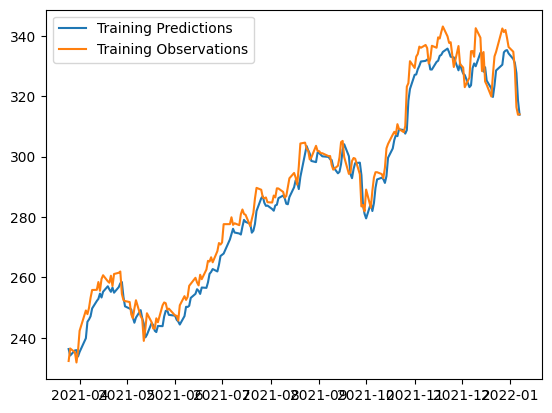

In [15]:
# Faire des prédictions sur les données d'entraînement avec le modèle
train_predictions = model.predict(X_train).flatten()

# Tracer les prédictions du modèle sur les données d'entraînement
plt.plot(dates_train, train_predictions)

# Tracer les vraies valeurs (observations) pour les données d'entraînement
plt.plot(dates_train, y_train)

# Ajouter une légende pour différencier les prédictions et les observations réelles
plt.legend(['Training Predictions', 'Training Observations'])

# Afficher le graphique montrant les prédictions du modèle comparées aux vraies valeurs
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


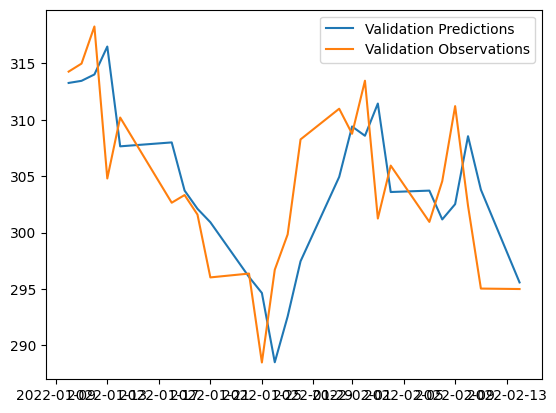

In [17]:
# Faire des prédictions sur les données de validation avec le modèle
val_predictions = model.predict(X_val).flatten()

# Tracer les prédictions du modèle sur les données de validation
plt.plot(dates_val, val_predictions)

# Tracer les vraies valeurs (observations) pour les données de validation
plt.plot(dates_val, y_val)

# Ajouter une légende pour différencier les prédictions et les observations réelles sur les données de validation
plt.legend(['Validation Predictions', 'Validation Observations'])

# Afficher le graphique montrant les prédictions du modèle comparées aux vraies valeurs sur l'ensemble de validation
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


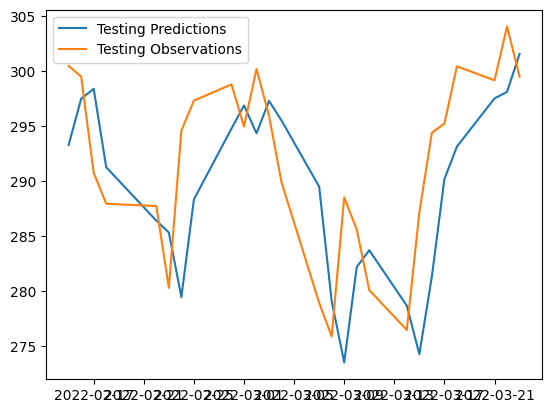

In [18]:
# Faire des prédictions sur les données de test avec le modèle
test_predictions = model.predict(X_test).flatten()

# Tracer les prédictions du modèle sur les données de test
plt.plot(dates_test, test_predictions)

# Tracer les vraies valeurs (observations) pour les données de test
plt.plot(dates_test, y_test)

# Ajouter une légende pour différencier les prédictions et les observations réelles sur les données de test
plt.legend(['Testing Predictions', 'Testing Observations'])

# Afficher le graphique montrant les prédictions du modèle comparées aux vraies valeurs sur l'ensemble de test
plt.show()


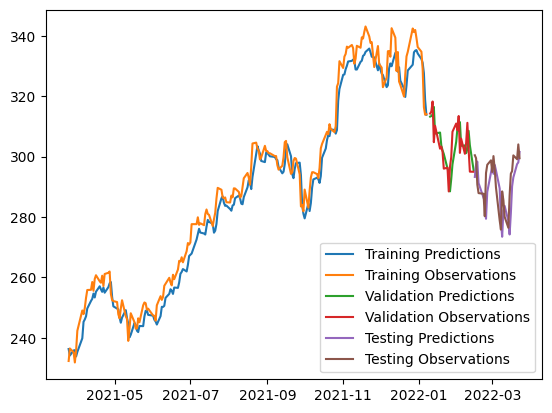

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [21]:
from copy import deepcopy

# Initialiser une liste pour stocker les prédictions faites de manière récursive
recursive_predictions = []

# Combiner les dates de validation et de test en une seule liste de dates
recursive_dates = np.concatenate([dates_val, dates_test])

# Boucle sur toutes les dates de validation et de test pour effectuer des prédictions récursives
for target_date in recursive_dates:

    # Copier la dernière fenêtre d'entraînement (les 3 dernières valeurs) pour éviter de modifier les données d'origine
    last_window = deepcopy(X_train[-1])

    # Utiliser le modèle pour prédire la prochaine valeur en utilisant la dernière fenêtre d'entraînement
    next_prediction = model.predict(np.array([last_window])).flatten()

    # Ajouter cette prédiction à la liste des prédictions récursives
    recursive_predictions.append(next_prediction)

    # Mettre à jour la fenêtre pour la prochaine itération : remplacer la dernière valeur par la nouvelle prédiction
    last_window[-1] = next_prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

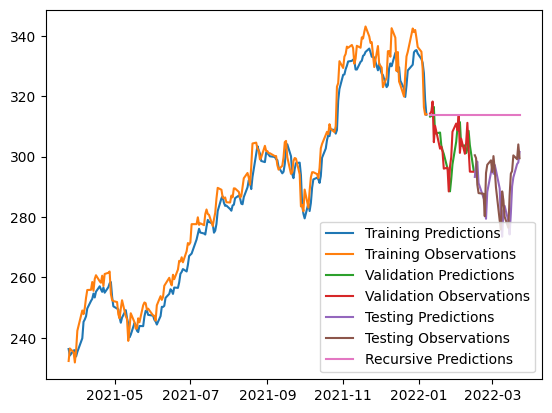

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])